In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from sklearn.externals import joblib

% matplotlib inline

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("~/real_estate/data/v11/train_df_smote_ratio.csv")
test_df = pd.read_csv("~/real_estate/data/v11/test_df.csv")

features = train_df.columns[:-1]

X_train = train_df[features]
X_test = test_df[features]
y_train = train_df["target"]
y_test = test_df["target"]

In [16]:
# compile DNN
#model = Sequential()
#model.add(Dense(units=100, activation='relu', input_dim=69))
#model.add(Dense(units=50, activation='relu'))
#model.add(Dense(units=25, activation='relu'))
#model.add(Dense(units=1))
#model.compile(loss='mean_squared_error', optimizer='adam')

# Run DNN
model.fit(X_train, y_train, epochs=1, batch_size=10)

Epoch 1/1
281964/281964 [==============================] - 70s 246us/step - loss: 0.0049


In [17]:
# Get predictions and errors
y_train_hat = model.predict(X_train).reshape(1, -1)
y_test_hat = model.predict(X_test).reshape(1, -1)

errors_train = abs(y_train_hat - y_train.values)
errors_test = abs(y_test_hat - y_test.values)

print("Mean test error: ", np.mean(errors_test))
print("Mean test value: ", np.mean(y_test))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat)[0,1]))
print('---')
print("Mean train error: ", np.mean(errors_train))
print("Mean train value: ", np.mean(y_train))
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat)[0,1]))

Mean test error:  0.049036430184308956
Mean test value:  0.0838149683686396
R^2 test:  0.24868903528629585
---
Mean train error:  0.051868941418950716
Mean train value:  0.1271504123662331
R^2 train:  0.8926983693886643


In [13]:
### model.save("/home/gnazareths/real_estate/v11/models/dnn_smote_0214.h5")

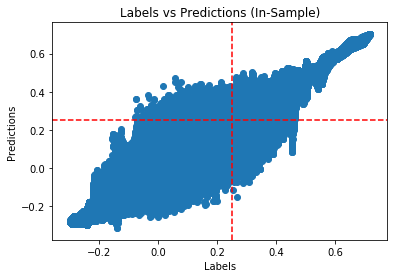

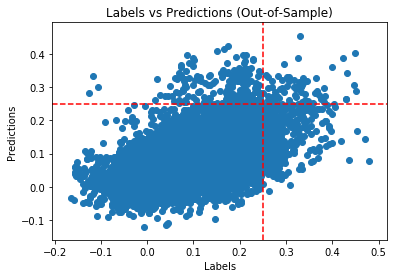

In [18]:
plt.scatter(y_train, y_train_hat)
plt.title("Labels vs Predictions (In-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat)
plt.title("Labels vs Predictions (Out-of-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

In [19]:
predictive_df = pd.DataFrame({"label": y_test.values, "pred": y_test_hat[0]})
predictive_df = predictive_df.sort_values(by=["pred"], ascending=False)

predictive_df_25 = predictive_df.loc[predictive_df["pred"] >= .25]
top_10_predictions = predictive_df.head(n=10)
top_25_predictions = predictive_df.head(n=25)

mean_return_over_25 = np.mean(predictive_df_25["label"].values)
mean_return_top_10_predictions = np.mean(top_10_predictions["label"].values)
mean_return_top_25_predictions = np.mean(top_25_predictions["label"].values)

print("Mean return for predictions above 25%: ", mean_return_over_25)
print("Mean return for top 10 predictions: ", mean_return_top_10_predictions)
print("Mean return for top 25 predictions: ", mean_return_top_25_predictions)

Mean return for predictions above 25%:  0.205282787811654
Mean return for top 10 predictions:  0.23945166967935444
Mean return for top 25 predictions:  0.20847951510671156
